Homework 4: Sentiment Analysis - Task 4
----

Names
----
Names: Kaan Tural, Arinjay Singh

Task 4: Neural Networks (20 points)
----

Next, we'll train a feedforward neural net to work with this data. You'll train one neural net which takes the same input as your Logistic Regression model - a sparse vector representing documents as bags of words.

In [26]:
import sentiment_utils as sutils
import numpy as np

from keras.models import Sequential
from keras.layers import Dense

# you can experiment with having some Dropout layers if you'd like to
# this is not required
from keras.layers import Dropout

# if you want to use this again
from sklearn.feature_extraction.text import CountVectorizer



In [27]:
# define constants for the files we are using
TRAIN_FILE = "movie_reviews_train.txt"
DEV_FILE = "movie_reviews_dev.txt"

# load in your data and make sure you understand the format
# Do not print out too much so as to impede readability of your notebook
train_tups = sutils.generate_tuples_from_file(TRAIN_FILE)
dev_tups = sutils.generate_tuples_from_file(DEV_FILE)

trainX, trainY = train_tups
devX, devY = dev_tups

# you may use either your sparse vectors or sklearn's CountVectorizer's sparse vectors
# you will experiment with multinomial and binarized representations later


In [28]:
def create_vectors(train_data, dev_data, binarized = False, use_count_vectorizer = False):
    if use_count_vectorizer:
        vectorizer = CountVectorizer(binary=binarized)
        vectorized_train_data = vectorizer.fit_transform([' '.join(x) for x in train_data])
        vectorized_dev_data = vectorizer.transform([' '.join(x) for x in dev_data])
    else:
        vocab = list(set([token for sublist in trainX for token in sublist]))
        vectorized_train_data = sutils.featurize(vocab=vocab, data_to_be_featurized_X=train_data, binary=binarized)
        vectorized_dev_data = sutils.featurize(vocab=vocab, data_to_be_featurized_X=dev_data, binary=binarized)
        
    return vectorized_train_data, vectorized_dev_data

In [29]:
count_vectorizer_train_data, count_vectorizer_dev_data = create_vectors(train_data=trainX, dev_data=devX, binarized=False, use_count_vectorizer=True)

In [30]:
# Create a feedforward neural network model
# that takes a sparse BoW representation of the data as input
# and makes a binary classification of positive/negative sentiment as output
# you may use any number of hidden layers >= 1 and any number of units in each hidden layer (we recommend between 50-200)
# you may use any activation function on the hidden layers 
# you should use a sigmoid activation function on the output layer
# you should use binary cross-entropy as your loss function
# sgd is an appropriate optimizer for this task
# you should report accuracy as your metric
# you may add Dropout layers if you'd like to

# create/compile your model in this cell

X = np.array(count_vectorizer_train_data.toarray())
y = np.array(trainY)

model = Sequential()
model.add(Dense(units=100, activation='relu', input_dim=X.shape[1]))

# put in an output layer
model.add(Dense(units=1, activation='sigmoid'))

model.summary()
# call compile here
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 100)               2259700   
                                                                 
 dense_8 (Dense)             (None, 1)                 101       
                                                                 
Total params: 2259801 (8.62 MB)
Trainable params: 2259801 (8.62 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


How many trainable parameters does your model have? __YOUR ANSWER HERE__

In [31]:
# train your model
# reports an accuracy of 0.78 at that point using the sgd optimizer

# Failed to find data adapter that can handle input: <class 'numpy.ndarray'>, (<class 'list'> containing values of types {"<class 'int'>"})
# indicates you should change a list into a numpy array

model.fit(X, y, epochs=50, verbose=1)

Epoch 1/50
50/50 [==============================] - 0s 5ms/step - loss: 0.6733 - accuracy: 0.5925
Epoch 2/50
50/50 [==============================] - 0s 3ms/step - loss: 0.6264 - accuracy: 0.6737
Epoch 3/50
50/50 [==============================] - 0s 3ms/step - loss: 0.5958 - accuracy: 0.7025
Epoch 4/50
50/50 [==============================] - 0s 4ms/step - loss: 0.5508 - accuracy: 0.7356
Epoch 5/50
50/50 [==============================] - 0s 4ms/step - loss: 0.5330 - accuracy: 0.7519
Epoch 6/50
50/50 [==============================] - 0s 4ms/step - loss: 0.4994 - accuracy: 0.7819
Epoch 7/50
50/50 [==============================] - 0s 3ms/step - loss: 0.4697 - accuracy: 0.7900
Epoch 8/50
50/50 [==============================] - 0s 4ms/step - loss: 0.4289 - accuracy: 0.8244
Epoch 9/50
50/50 [==============================] - 0s 3ms/step - loss: 0.4345 - accuracy: 0.8231
Epoch 10/50
50/50 [==============================] - 0s 3ms/step - loss: 0.4058 - accuracy: 0.8369
Epoch 11/50
50/50 [

In [32]:
# make a prediction on the dev set
# then make a classification decision based on that prediction
dev_X = np.array(count_vectorizer_dev_data.toarray())
dev_Y = np.array(devY)


preds = model.predict(dev_X)

# convert the predictions to a 0-1 binary output
class_preds = [1 if p > 0.5 else 0 for p in preds]


7/7 [==============================] - 0s 2ms/step


In [33]:
# use the model.evaluate function to report the loss and accuracy on the dev set
model.evaluate(dev_X, dev_Y)

7/7 [==============================] - 0s 2ms/step - loss: 0.4736 - accuracy: 0.7800


[0.4735599458217621, 0.7799999713897705]

### Multinomial

In [34]:
from sklearn.metrics import f1_score

f1_score(dev_Y, class_preds)

0.7904761904761904

### Binary

In [36]:
bi_count_vectorizer_train_data, bi_count_vectorizer_dev_data = create_vectors(train_data=trainX, dev_data=devX, binarized=True, use_count_vectorizer=True)

# convert to np array
X = np.array(bi_count_vectorizer_train_data.toarray())
y = np.array(trainY)
dev_X = np.array(bi_count_vectorizer_dev_data.toarray())
dev_Y = np.array(devY)

bi_model = Sequential()
bi_model.add(Dense(units=100, activation='relu', input_dim=X.shape[1]))
bi_model.add(Dense(units=1, activation='sigmoid'))
bi_model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
bi_model.fit(X, y, epochs=50, verbose=1)
bi_preds = bi_model.predict(dev_X)
bi_class_preds = [1 if p > 0.5 else 0 for p in bi_preds]
bi_model.evaluate(dev_X, dev_Y)
f1_score(dev_Y, bi_class_preds)

Epoch 1/50
50/50 [==============================] - 0s 3ms/step - loss: 0.6858 - accuracy: 0.5831
Epoch 2/50
50/50 [==============================] - 0s 3ms/step - loss: 0.6632 - accuracy: 0.7050
Epoch 3/50
50/50 [==============================] - 0s 3ms/step - loss: 0.6364 - accuracy: 0.7981
Epoch 4/50
50/50 [==============================] - 0s 3ms/step - loss: 0.6064 - accuracy: 0.8288
Epoch 5/50
50/50 [==============================] - 0s 3ms/step - loss: 0.5750 - accuracy: 0.8413
Epoch 6/50
50/50 [==============================] - 0s 3ms/step - loss: 0.5437 - accuracy: 0.8675
Epoch 7/50
50/50 [==============================] - 0s 3ms/step - loss: 0.5120 - accuracy: 0.8694
Epoch 8/50
50/50 [==============================] - 0s 4ms/step - loss: 0.4838 - accuracy: 0.8806
Epoch 9/50
50/50 [==============================] - 0s 3ms/step - loss: 0.4567 - accuracy: 0.8931
Epoch 10/50
50/50 [==============================] - 0s 3ms/step - loss: 0.4302 - accuracy: 0.9013
Epoch 11/50
50/50 [

0.8148148148148148

Report the f1 scores for your model with the following settings, using the same number of epochs to train in both cases:
- number of epochs used: __50__
- multinomial features: __0.7904761904761904__ 
- binarized features: __0.8148148148148148__

Epoch 1/150
5/5 [==============================] - 0s 6ms/step - loss: 0.6893 - accuracy: 0.5375
Epoch 2/150
5/5 [==============================] - 0s 3ms/step - loss: 0.6763 - accuracy: 0.6187
Epoch 3/150
5/5 [==============================] - 0s 3ms/step - loss: 0.6645 - accuracy: 0.6938
Epoch 4/150
5/5 [==============================] - 0s 4ms/step - loss: 0.6541 - accuracy: 0.7812
Epoch 5/150
5/5 [==============================] - 0s 4ms/step - loss: 0.6428 - accuracy: 0.8062
Epoch 6/150
5/5 [==============================] - 0s 3ms/step - loss: 0.6321 - accuracy: 0.8562
Epoch 7/150
5/5 [==============================] - 0s 6ms/step - loss: 0.6209 - accuracy: 0.9000
Epoch 8/150
5/5 [==============================] - 0s 6ms/step - loss: 0.6101 - accuracy: 0.9187
Epoch 9/150
5/5 [==============================] - 0s 5ms/step - loss: 0.6001 - accuracy: 0.9187
Epoch 10/150
5/5 [==============================] - 0s 3ms/step - loss: 0.5906 - accuracy: 0.9625
Epoch 11/150
5/5 [===========

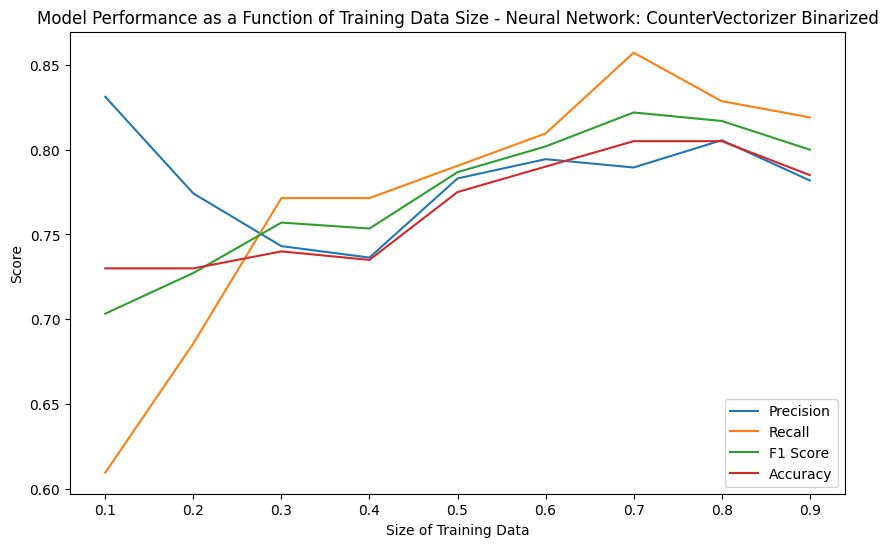

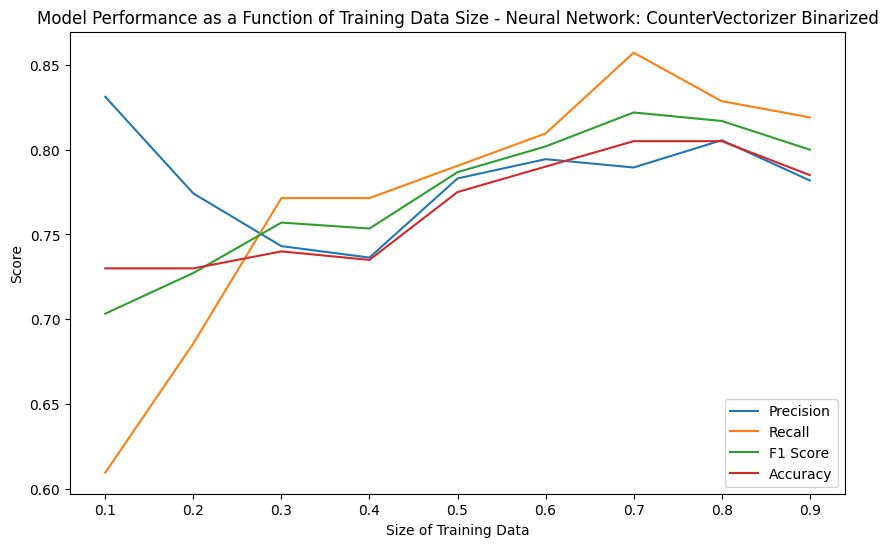

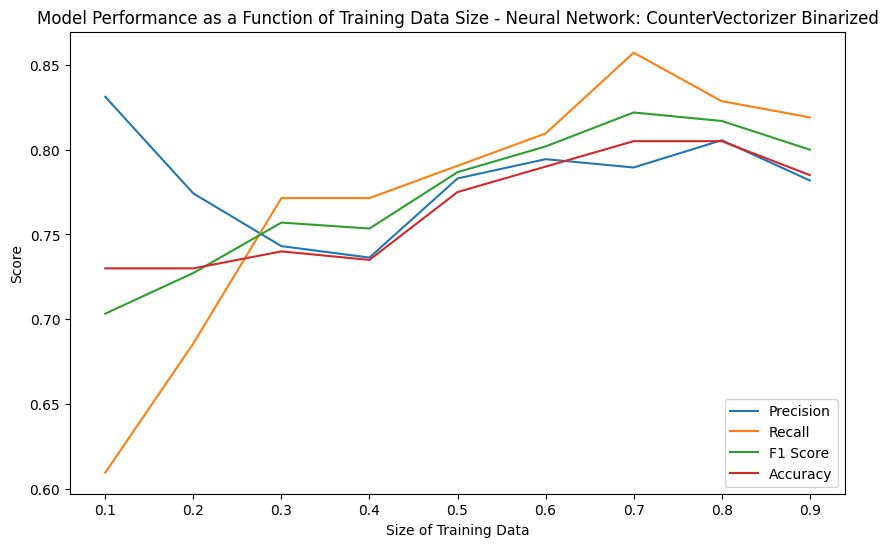

In [38]:
from sklearn.model_selection import train_test_split

# create the same graph as with NB and LR, with your neural network model instead!
# make sure to re-create your model each time you train it — you don't want to start with
# an already trained network!

# you should experiment with different numbers of epochs to see how performance varies
# you need not create an experiment that takes > 10 min to run (please do not do this)

train_sizes = np.linspace(0.1, 0.9, 9)
metrics = list()

for train_size in train_sizes:
    X_train, _, y_train, _ = train_test_split(bi_count_vectorizer_train_data, trainY, train_size=train_size, random_state=42)
    
    X = np.array(X_train.toarray())
    y = np.array(y_train)

    bi_model = Sequential()
    bi_model.add(Dense(units=100, activation='relu', input_dim=X.shape[1]))
    bi_model.add(Dense(units=1, activation='sigmoid'))
    bi_model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
    bi_model.fit(X, y, epochs=(i*50), verbose=1)
    bi_preds = bi_model.predict(dev_X)
    bi_class_preds = [1 if p > 0.5 else 0 for p in bi_preds]
    
    current_metrics = sutils.get_prfa(dev_Y, bi_class_preds)
    metrics.append(current_metrics)
    
for i in range(1, 4):
    sutils.create_training_graph(train_sizes, metrics, "Neural Network: CounterVectorizer Binarized", f"NN_graph_{i}.png")